In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [3]:
survey_raw_df=pd.read_csv('survey_results_public.csv')

In [4]:
survey_raw_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [5]:
print(survey_raw_df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [6]:
survey_fname=pd.read_csv('survey_results_schema.csv')

In [7]:
survey_fname

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
...,...,...,...,...,...,...
82,QID337,JobSatPoints_7,"Learning and using new technology, including p...",NaN,MC,MAVR
83,QID337,JobSatPoints_8,"Designing and building environments, databases...",NaN,MC,MAVR
84,QID337,JobSatPoints_9,"Being a power user of a tool, developer langua...",NaN,MC,MAVR
85,QID337,JobSatPoints_10,Working with new and/or top-quality hardware,NaN,MC,MAVR


In [8]:
survey_fname.qname.unique()

array(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'Language', 'Database',
       'Platform', 'Webframe', 'Embedded', 'MiscTech', 'ToolsTech',
       'NEWCollabTools', 'OpSys', 'OfficeStackAsync', 'OfficeStackSync',
       'AISearchDev', 'NEWSOSites', 'SOVisitFreq', 'SOAccount',
       'SOPartFreq', 'SOHow', 'SOComm', 'AISelect', 'AISent', 'AIBen',
       'AIAcc', 'AIComplex', 'AITool', 'AINext', 'AIThreat', 'AIEthics',
       'AIChallenges', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Frustration',
       'ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion',
       'Industry', 'JobSat', 'JobSatPoints', 'SOTeamsUsage',
       'SurveyLength', 'SurveyEase', 'K

In [9]:
len(survey_fname.qname.unique())

87

In [10]:
survey_fname.qid.unique()

array(['QID2', 'QID127', 'QID296', 'QID308', 'QID341', 'QID297', 'QID25',
       'QID276', 'QID281', 'QID331', 'QID32', 'QID34', 'QID31', 'QID29',
       'QID278', 'QID279', 'QID330', 'QID335', 'QID6', 'QID50', 'QID51',
       'QID233', 'QID262', 'QID263', 'QID264', 'QID340', 'QID265',
       'QID275', 'QID274', 'QID71', 'QID282', 'QID307', 'QID327',
       'QID266', 'QID100', 'QID101', 'QID102', 'QID334', 'QID106',
       'QID314', 'QID315', 'QID324', 'QID316', 'QID343', 'QID319',
       'QID320', 'QID338', 'QID339', 'QID346', 'QID299', 'QID287',
       'QID288', 'QID289', 'QID290', 'QID291', 'QID292', 'QID342',
       'QID304', 'QID332', 'QID333', 'QID326', 'QID336', 'QID337',
       'QID286', 'QID132', 'QID133'], dtype=object)

In [11]:
survey_fname.drop(['qid','force_resp','type','selector'],axis=1,inplace=True)

In [12]:
survey_fname.columns=['Column','QuestionText']

In [13]:
survey_fname.columns

Index(['Column', 'QuestionText'], dtype='object')

In [14]:
type(survey_fname)

pandas.core.frame.DataFrame

In [15]:
survey_fname.set_index('Column',inplace=True)

In [16]:
survey_fname.to_csv('schema_fname.csv')

In [17]:
schema_fname='schema_fname.csv'

In [18]:
schema_raw=pd.read_csv(schema_fname,index_col='Column').QuestionText

In [19]:
schema_raw

Column
MainBranch         Which of the following options best describes ...
Age                                               What is your age?*
Employment         Which of the following best describes your cur...
RemoteWork         Which best describes your current work situation?
Check              Just checking to make sure you are paying atte...
                                         ...                        
JobSatPoints_7     Learning and using new technology, including p...
JobSatPoints_8     Designing and building environments, databases...
JobSatPoints_9     Being a power user of a tool, developer langua...
JobSatPoints_10         Working with new and/or top-quality hardware
JobSatPoints_11    A well-staffed/sourced internal network that m...
Name: QuestionText, Length: 87, dtype: object

In [20]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

##### We've now loaded the dataset, and are ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents & the global programming community
- Distribution of programming skills, experience and preferences
- Employment-related information & preferences 

Let's select a subset of columns with the relevant data.

In [21]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'EdLevel',
    'RemoteWork',
    'OrgSize',
    'Industry',

    # Programming Experience
    'LearnCode',
    'YearsCode',
    'YearsCodePro',
    'TechDoc',
    'CodingActivities',
    'SOVisitFreq',
    'ProfessionalTech',

    # Employment
    'Employment',
    'DevType',
    'WorkExp',
    'JobSat',
    'MainBranch',
    'Check'
]



In [22]:
len(selected_columns)

19

In [23]:
survey_df=survey_raw_df[selected_columns].copy()

In [24]:
schema=schema_raw[selected_columns]

In [25]:
schema = schema.str.replace(r'<.*?>', '', regex=True)

In [26]:
survey_df.head()

,Country,Age,EdLevel,RemoteWork,OrgSize,Industry,LearnCode,YearsCode,YearsCodePro,TechDoc,CodingActivities,SOVisitFreq,ProfessionalTech,Employment,DevType,WorkExp,JobSat,MainBranch,Check
0,United States of America,Under 18 years old,Primary/elementary school,Remote,NaN,NaN,Books / Physical media,NaN,NaN,NaN,Hobby,NaN,NaN,"Employed, full-time",NaN,NaN,NaN,I am a developer by profession,Apples
1,United Kingdom of Great Britain and Northern I...,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,NaN,NaN,Books / Physical media;Colleague;On the job tr...,20,17,API document(s) and/or SDK document(s);User gu...,Hobby;Contribute to open-source projects;Other...,Multiple times per day,NaN,"Employed, full-time","Developer, full-stack",17.0,NaN,I am a developer by profession,Apples
2,United Kingdom of Great Britain and Northern I...,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,NaN,NaN,Books / Physical media;Colleague;On the job tr...,37,27,API document(s) and/or SDK document(s);User gu...,Hobby;Contribute to open-source projects;Other...,Multiple times per day,NaN,"Employed, full-time",Developer Experience,NaN,NaN,I am a developer by profession,Apples
3,Canada,18-24 years old,Some college/university study without earning ...,NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",4,NaN,NaN,NaN,Daily or almost daily,NaN,"Student, full-time","Developer, full-stack",NaN,NaN,I am learning to code,Apples
4,Norway,18-24 years old,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",9,NaN,API document(s) and/or SDK document(s);User gu...,NaN,Multiple times per day,NaN,"Student, full-time","Developer, full-stack",NaN,NaN,I am a developer by profession,Apples


In [27]:
schema.head()

Column
Country                                    Where do you live? *
Age                                          What is your age?*
EdLevel       Which of the following best describes the high...
RemoteWork    Which best describes your current work situation?
OrgSize       Approximately how many people are employed by ...
Name: QuestionText, dtype: object

In [28]:
print(schema.shape)
print(survey_df.shape)

(19,)
(65437, 19)


In [29]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           58930 non-null  object 
 1   Age               65437 non-null  object 
 2   EdLevel           60784 non-null  object 
 3   RemoteWork        54806 non-null  object 
 4   OrgSize           47480 non-null  object 
 5   Industry          28858 non-null  object 
 6   LearnCode         60488 non-null  object 
 7   YearsCode         59869 non-null  object 
 8   YearsCodePro      51610 non-null  object 
 9   TechDoc           40897 non-null  object 
 10  CodingActivities  54466 non-null  object 
 11  SOVisitFreq       59536 non-null  object 
 12  ProfessionalTech  27764 non-null  object 
 13  Employment        65437 non-null  object 
 14  DevType           59445 non-null  object 
 15  WorkExp           29658 non-null  float64
 16  JobSat            29126 non-null  float6

In [30]:
survey_df['Age'].unique

<bound method Series.unique of 0        Under 18 years old
1           35-44 years old
2           45-54 years old
3           18-24 years old
4           18-24 years old
                ...        
65432       18-24 years old
65433       25-34 years old
65434       25-34 years old
65435       18-24 years old
65436       18-24 years old
Name: Age, Length: 65437, dtype: object>

In [31]:
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

survey_df['Age_num'] = survey_df['Age'].map(age_mapping)


In [32]:
# These are still numeric and useful:
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')


In [36]:
survey_df['Age1stCode'] = survey_df['Age_num'] - survey_df['YearsCode']
survey_df['Age1stCode'] = survey_df['Age1stCode'].where(survey_df['Age1stCode'] > 0)


In [37]:
survey_df.head()

,Country,Age,EdLevel,RemoteWork,OrgSize,Industry,LearnCode,YearsCode,YearsCodePro,TechDoc,...,SOVisitFreq,ProfessionalTech,Employment,DevType,WorkExp,JobSat,MainBranch,Check,Age_num,Age1stCode
0,United States of America,Under 18 years old,Primary/elementary school,Remote,NaN,NaN,Books / Physical media,NaN,NaN,NaN,...,NaN,NaN,"Employed, full-time",NaN,NaN,NaN,I am a developer by profession,Apples,16.0,NaN
1,United Kingdom of Great Britain and Northern I...,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,NaN,NaN,Books / Physical media;Colleague;On the job tr...,20.0,17.0,API document(s) and/or SDK document(s);User gu...,...,Multiple times per day,NaN,"Employed, full-time","Developer, full-stack",17.0,NaN,I am a developer by profession,Apples,39.0,19.0
2,United Kingdom of Great Britain and Northern I...,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,NaN,NaN,Books / Physical media;Colleague;On the job tr...,37.0,27.0,API document(s) and/or SDK document(s);User gu...,...,Multiple times per day,NaN,"Employed, full-time",Developer Experience,NaN,NaN,I am a developer by profession,Apples,49.0,12.0
3,Canada,18-24 years old,Some college/university study without earning ...,NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",4.0,NaN,NaN,...,Daily or almost daily,NaN,"Student, full-time","Developer, full-stack",NaN,NaN,I am learning to code,Apples,21.0,17.0
4,Norway,18-24 years old,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",9.0,NaN,API document(s) and/or SDK document(s);User gu...,...,Multiple times per day,NaN,"Student, full-time","Developer, full-stack",NaN,NaN,I am a developer by profession,Apples,21.0,12.0


In [38]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')

In [39]:
print(survey_df['Age1stCode'].isnull().sum())
print(survey_df['YearsCode'].isnull().sum())
print(survey_df['YearsCodePro'].isnull().sum())

6640
6391
16733


In [40]:
survey_df.columns.tolist()

['Country',
 'Age',
 'EdLevel',
 'RemoteWork',
 'OrgSize',
 'Industry',
 'LearnCode',
 'YearsCode',
 'YearsCodePro',
 'TechDoc',
 'CodingActivities',
 'SOVisitFreq',
 'ProfessionalTech',
 'Employment',
 'DevType',
 'WorkExp',
 'JobSat',
 'MainBranch',
 'Check',
 'Age_num',
 'Age1stCode']

In [41]:
survey_df.columns= ['Country',
 'Age',
 'EdLevel',
 'RemoteWork',
 'OrgSize',
 'Industry',
 'LearnCode',
 'YearsCode',
 'YearsCodePro',
 'TechDoc',
 'CodingActivities',
 'SOVisitFreq',
 'ProfessionalTech',
 'Employment',
 'DevType',
 'WorkExp',
 'JobSat',
 'MainBranch',
 'Check',
 'Avg_Age',
 'Age1stCode']

In [42]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp,JobSat,Avg_Age,Age1stCode
count,59046.000000,48704.000000,29658.000000,29126.000000,65115.000000,58797.000000
mean,14.175998,10.739652,11.466957,6.935041,32.641772,18.692178
std,10.361047,8.935175,9.168709,2.088259,11.140749,6.761652
min,1.000000,1.000000,0.000000,0.000000,16.000000,1.000000
25%,6.000000,4.000000,4.000000,6.000000,21.000000,14.000000
50%,11.000000,8.000000,9.000000,7.000000,29.000000,18.000000
75%,20.000000,15.000000,16.000000,8.000000,39.000000,22.000000
max,50.000000,50.000000,50.000000,10.000000,70.000000,68.000000


There seems to be a problem with the age1stcode column, as the minimum value is 1. This is a common issues with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be ignore the rows where the value in the age column is higher than 100 years or lower than 10 years as invalid survey responses.

In [43]:
len(survey_df[survey_df.Age1stCode<=8])

1429

In [44]:
survey_df.drop(survey_df[survey_df.Age1stCode<=8].index,inplace=True)

In [45]:
survey_df.head(1)

,Country,Age,EdLevel,RemoteWork,OrgSize,Industry,LearnCode,YearsCode,YearsCodePro,TechDoc,...,SOVisitFreq,ProfessionalTech,Employment,DevType,WorkExp,JobSat,MainBranch,Check,Avg_Age,Age1stCode
0,United States of America,Under 18 years old,Primary/elementary school,Remote,NaN,NaN,Books / Physical media,NaN,NaN,NaN,...,NaN,NaN,"Employed, full-time",NaN,NaN,NaN,I am a developer by profession,Apples,16.0,NaN


In [46]:
survey_df.Age1stCode.isnull().sum()

np.int64(6640)

In [47]:
survey_df[survey_df.WorkExp>=40].head(2)

,Country,Age,EdLevel,RemoteWork,OrgSize,Industry,LearnCode,YearsCode,YearsCodePro,TechDoc,...,SOVisitFreq,ProfessionalTech,Employment,DevType,WorkExp,JobSat,MainBranch,Check,Avg_Age,Age1stCode
397,United States of America,55-64 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,NaN,"Internet, Telecomm or Information Services",Books / Physical media;On the job training;Onl...,44.0,40.0,NaN,...,Daily or almost daily,DevOps function;Automated testing;Observabilit...,"Employed, full-time",Engineering manager,44.0,5.0,"I am not primarily a developer, but I write co...",Apples,59.0,15.0
453,United Kingdom of Great Britain and Northern I...,65 years or older,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",In-person,"1,000 to 4,999 employees",Other:,On the job training;Other online resources (e....,40.0,39.0,API document(s) and/or SDK document(s);User gu...,...,Multiple times per day,Continuous integration (CI) and (more often) c...,"Employed, full-time","Developer, full-stack",40.0,8.0,I am a developer by profession,Apples,70.0,30.0


In [48]:
survey_df.sample(10)

,Country,Age,EdLevel,RemoteWork,OrgSize,Industry,LearnCode,YearsCode,YearsCodePro,TechDoc,...,SOVisitFreq,ProfessionalTech,Employment,DevType,WorkExp,JobSat,MainBranch,Check,Avg_Age,Age1stCode
3764,Germany,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)",500 to 999 employees,NaN,"Other online resources (e.g., videos, blogs, f...",5.0,NaN,NaN,...,Multiple times per day,NaN,"Employed, full-time",Project manager,NaN,NaN,"I am not primarily a developer, but I write co...",Apples,29.0,24.0
14599,Japan,55-64 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Just me - I am a freelancer, sole proprietor, ...",NaN,Books / Physical media;On the job training;Oth...,45.0,31.0,API document(s) and/or SDK document(s);User gu...,...,A few times per week,NaN,"Independent contractor, freelancer, or self-em...","Developer, full-stack",NaN,NaN,I am a developer by profession,Apples,59.0,14.0
4735,Poland,18-24 years old,Some college/university study without earning ...,In-person,10 to 19 employees,NaN,"Colleague;Other online resources (e.g., videos...",5.0,NaN,User guides or README files found in the sourc...,...,A few times per week,NaN,"Employed, part-time","Developer, QA or test",NaN,NaN,I am a developer by profession,Apples,21.0,16.0
61264,United Kingdom of Great Britain and Northern I...,Under 18 years old,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",4.0,NaN,NaN,...,Multiple times per day,NaN,"Student, full-time",Student,NaN,NaN,I am learning to code,Apples,16.0,12.0
23451,France,18-24 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",8.0,NaN,NaN,...,Multiple times per day,NaN,I prefer not to say,"Developer, full-stack",NaN,NaN,I am a developer by profession,Apples,21.0,13.0
57548,NaN,25-34 years old,NaN,"Hybrid (some remote, some in-person)",NaN,NaN,NaN,NaN,NaN,NaN,...,A few times per month or weekly,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,I am a developer by profession,Apples,29.0,NaN
54832,Russian Federation,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN,Books / Physical media;Colleague;Other online ...,6.0,NaN,API document(s) and/or SDK document(s);User gu...,...,A few times per month or weekly,NaN,"Student, full-time;Not employed, but looking f...",Student,NaN,NaN,I am a developer by profession,Apples,21.0,15.0
62401,Italy,35-44 years old,Some college/university study without earning ...,Remote,100 to 499 employees,NaN,Colleague;On the job training;Other online res...,22.0,18.0,API document(s) and/or SDK document(s);User gu...,...,Daily or almost daily,NaN,"Employed, full-time","Developer, back-end",NaN,NaN,I am a developer by profession,Apples,39.0,17.0
44711,Hungary,25-34 years old,Some college/university study without earning ...,Remote,20 to 99 employees,Other:,"Colleague;School (i.e., University, College, e...",9.0,6.0,NaN,...,A few times per week,DevOps function;Automated testing;Observabilit...,"Employed, full-time","Developer, front-end",6.0,10.0,I am a developer by profession,Apples,29.0,20.0
63640,NaN,18-24 years old,NaN,"Hybrid (some remote, some in-person)",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,"I am not primarily a developer, but I write co...",Apples,21.0,NaN


# Exploratory Data Analysis


##### Let's check the correltion among numeric values

In [49]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [50]:
heat_map=survey_df[['YearsCode','YearsCodePro','WorkExp','JobSat','Avg_Age','Age1stCode']].corr()

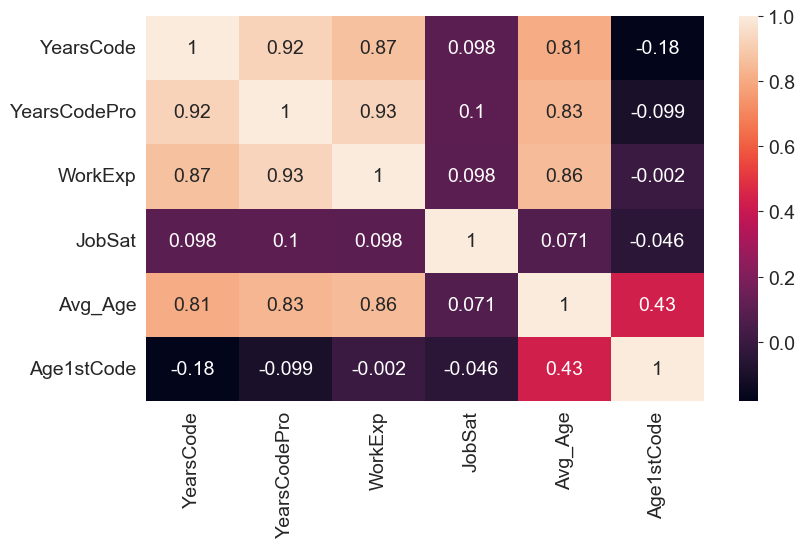

In [51]:
sns.heatmap(heat_map,annot=True)
plt.show()



#### Country

Let's look at country stats

In [52]:
schema.Country

'Where do you live? *'

In [53]:
survey_df.Country.nunique()

185

In [54]:
survey_df['Country'] = survey_df['Country'].replace({
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
})

In [55]:
top_countries=survey_df.Country.value_counts().head(15)
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'RespondentCount']
top_countries_df

,Country,RespondentCount
0,United States,10705
1,Germany,4801
2,India,4203
3,United Kingdom,3078
4,Ukraine,2656
5,France,2071
6,Canada,2031
7,Poland,1499
8,Netherlands,1398
9,Brazil,1358


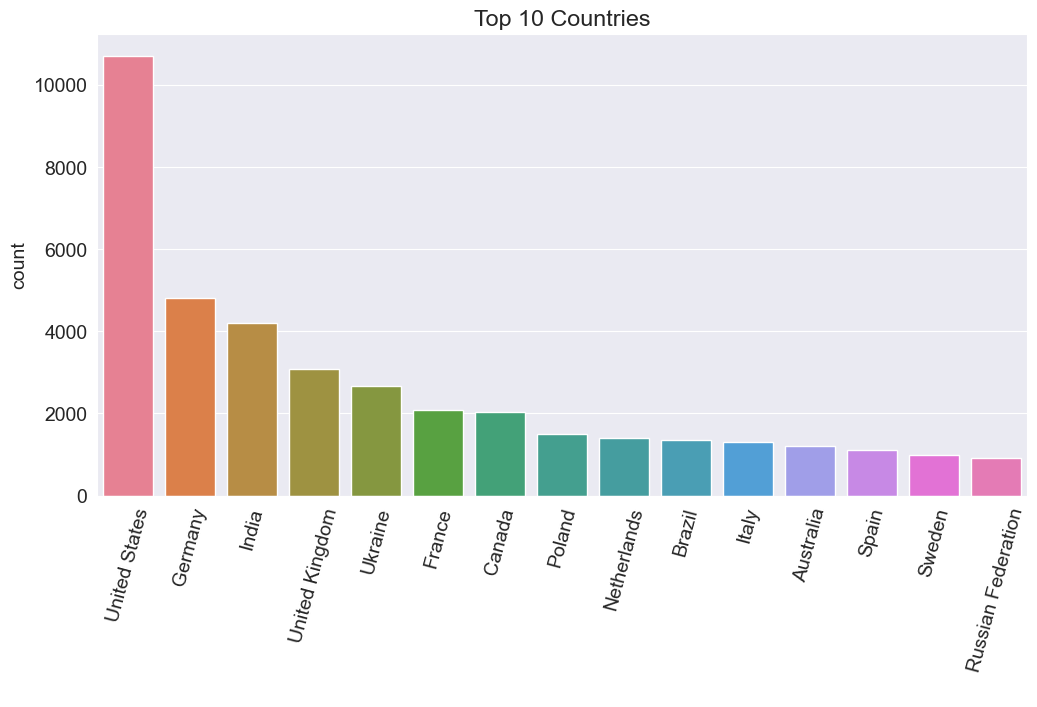

In [56]:
plt.figure(figsize=(12,6))
plt.xlabel(" ")
plt.title('Top 10 Countries')
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index,y=top_countries, palette='husl', legend=False)
plt.show()

It appears the that a disproportionately high number of respondents are from USA,Germany & India - which one might expect since the Survey is in English. 

### Age

The distribution of age of respondents is another important factot to look at, we can use a histogram to visualize it.

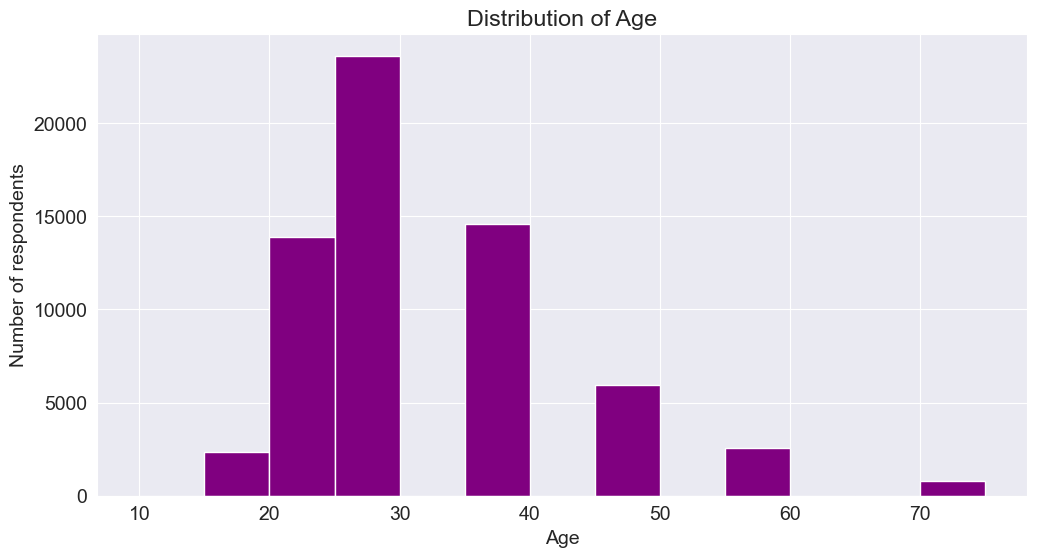

In [57]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Avg_Age, bins=np.arange(10,80,5), color='purple');

In [58]:
respondents_by_age = survey_df.groupby('Age').size()
respondents_by_age

Age
18-24 years old       13857
25-34 years old       23604
35-44 years old       14553
45-54 years old        5954
55-64 years old        2575
65 years or older       772
Prefer not to say       322
Under 18 years old     2371
dtype: int64

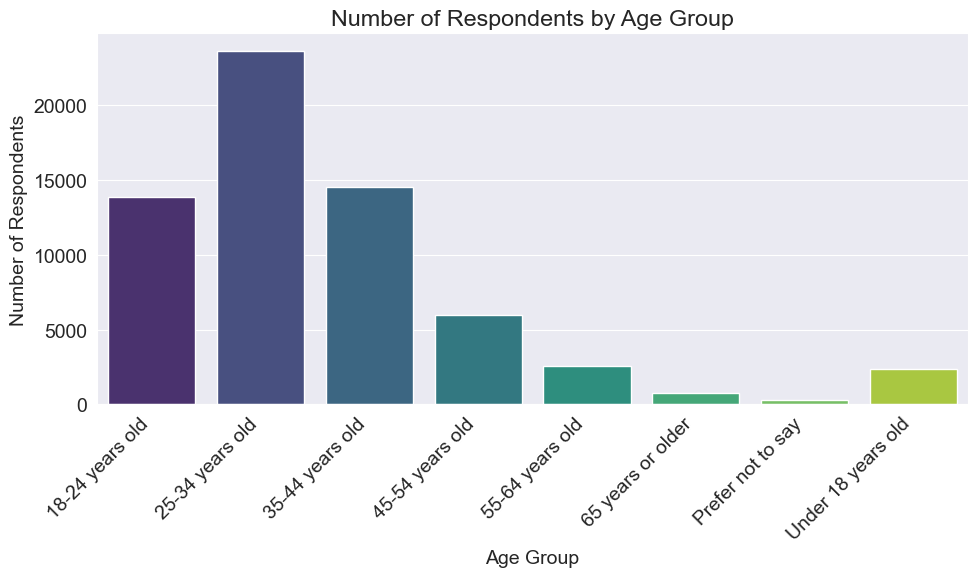

In [59]:
df_age = respondents_by_age.reset_index()
df_age.columns = ['Age Group', 'Respondents']

plt.figure(figsize=(10,6))
sns.barplot(data=df_age, x='Age Group', y='Respondents', palette='viridis')
plt.title('Number of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The majority of respondents are aged 25–34, followed by 18–24, indicating a young tech workforce.
Mid-career professionals (35–44) are also well represented.
Participation declines steadily beyond age 45, with few respondents aged 65 or older.
A small group of under-18s and those who did not disclose age are also present.

### Education Level

Let's compare the education levels using a horizontal bar plot

In [60]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [61]:
survey_df.EdLevel.unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

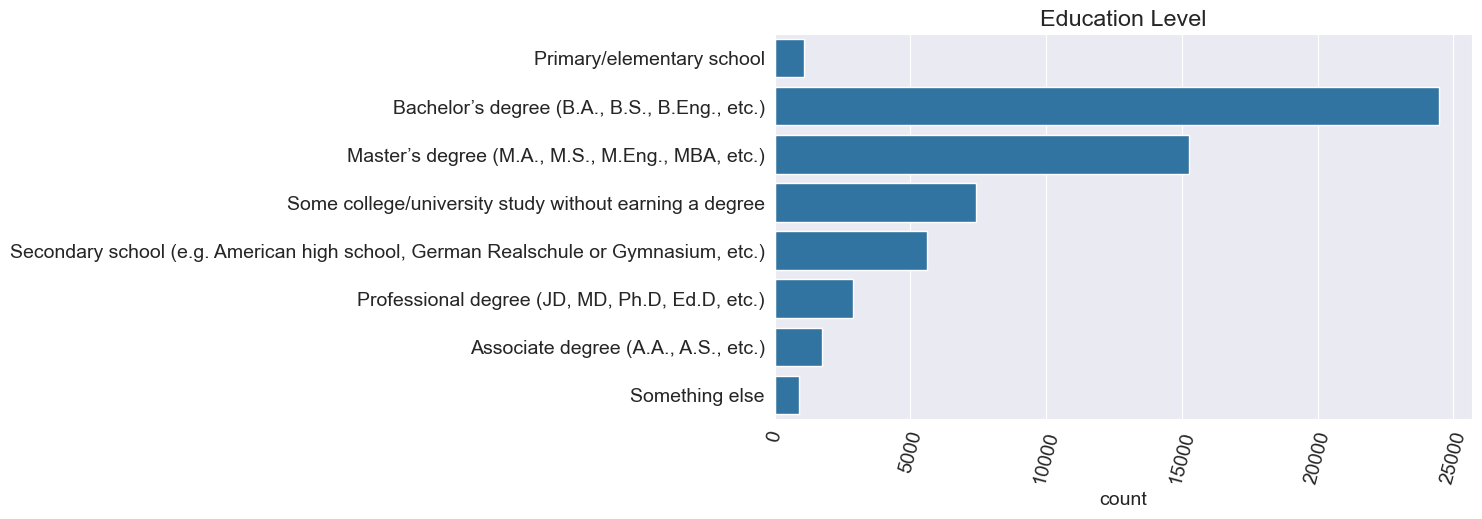

In [62]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title('Education Level')
plt.ylabel(None);

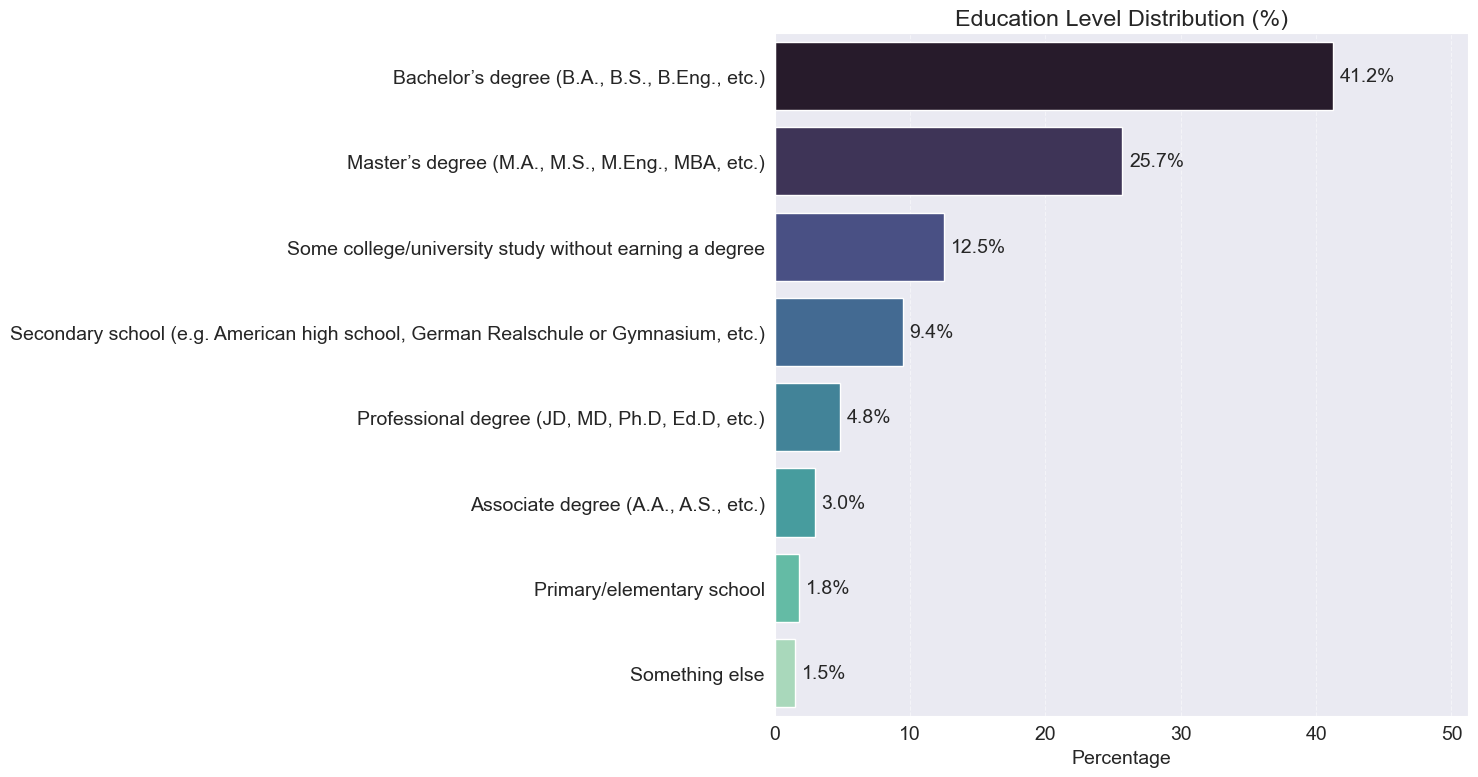

In [63]:

# Calculate percentage of each education level
ed_level_percent = (survey_df['EdLevel'].value_counts(normalize=True) * 100).reset_index()
ed_level_percent.columns = ['EdLevel', 'Percentage']

# Sort if you want better order
ed_level_percent = ed_level_percent.sort_values('Percentage', ascending=False)

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=ed_level_percent, y='EdLevel', x='Percentage', palette='mako')

# Add percentage labels
for index, row in ed_level_percent.iterrows():
    plt.text(row['Percentage'] + 0.5, index, f"{row['Percentage']:.1f}%", va='center')

plt.title('Education Level Distribution (%)')
plt.xlabel('Percentage')
plt.ylabel(None)
plt.xlim(0, ed_level_percent['Percentage'].max() + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [64]:
ed_level_percent

,EdLevel,Percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",41.223149
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25.679387
2,Some college/university study without earning ...,12.517901
3,"Secondary school (e.g. American high school, G...",9.441496
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",4.836998
5,"Associate degree (A.A., A.S., etc.)",2.956785
6,Primary/elementary school,1.824615
7,Something else,1.519670


The majority of survey respondents hold a Bachelor’s degree (41.2%), followed by Master’s degree holders (25.7%), indicating that over 66% of participants have at least an undergraduate-level education.

Interestingly, a significant portion (12.5%) have attended some college or university without completing a degree, and nearly 9.4% have only completed secondary school.

### Employment

We can also plot directly using Pandas

In [65]:
schema.Employment

'Which of the following best describes your current employment status? Select all that apply.*'

In [66]:
top_10_employment = survey_df['Employment'].value_counts().head(10).reset_index()
top_10_employment.columns = ['Employment', 'Count']
top_10_employment

,Employment,Count
0,"Employed, full-time",38293
1,"Independent contractor, freelancer, or self-em...",4707
2,"Student, full-time",4568
3,"Employed, full-time;Independent contractor, fr...",3466
4,"Not employed, but looking for work",2303
5,"Employed, part-time",1235
6,"Student, full-time;Employed, part-time",1084
7,"Employed, full-time;Student, full-time",887
8,"Employed, full-time;Student, part-time",827
9,"Student, full-time;Not employed, but looking f...",669


In [67]:
data_df=(survey_df['Employment'].value_counts(normalize=True)*100).reset_index()
employment_ten=data_df.head(10)
employment_ten

,Employment,proportion
0,"Employed, full-time",59.825334
1,"Independent contractor, freelancer, or self-em...",7.353768
2,"Student, full-time",7.136608
3,"Employed, full-time;Independent contractor, fr...",5.414948
4,"Not employed, but looking for work",3.597988
5,"Employed, part-time",1.929446
6,"Student, full-time;Employed, part-time",1.693538
7,"Employed, full-time;Student, full-time",1.385764
8,"Employed, full-time;Student, part-time",1.292026
9,"Student, full-time;Not employed, but looking f...",1.045182


In [68]:
employment_df = top_10_employment.merge(employment_ten[['Employment', 'proportion']], on='Employment', how='left')
employment_df

,Employment,Count,proportion
0,"Employed, full-time",38293,59.825334
1,"Independent contractor, freelancer, or self-em...",4707,7.353768
2,"Student, full-time",4568,7.136608
3,"Employed, full-time;Independent contractor, fr...",3466,5.414948
4,"Not employed, but looking for work",2303,3.597988
5,"Employed, part-time",1235,1.929446
6,"Student, full-time;Employed, part-time",1084,1.693538
7,"Employed, full-time;Student, full-time",887,1.385764
8,"Employed, full-time;Student, part-time",827,1.292026
9,"Student, full-time;Not employed, but looking f...",669,1.045182


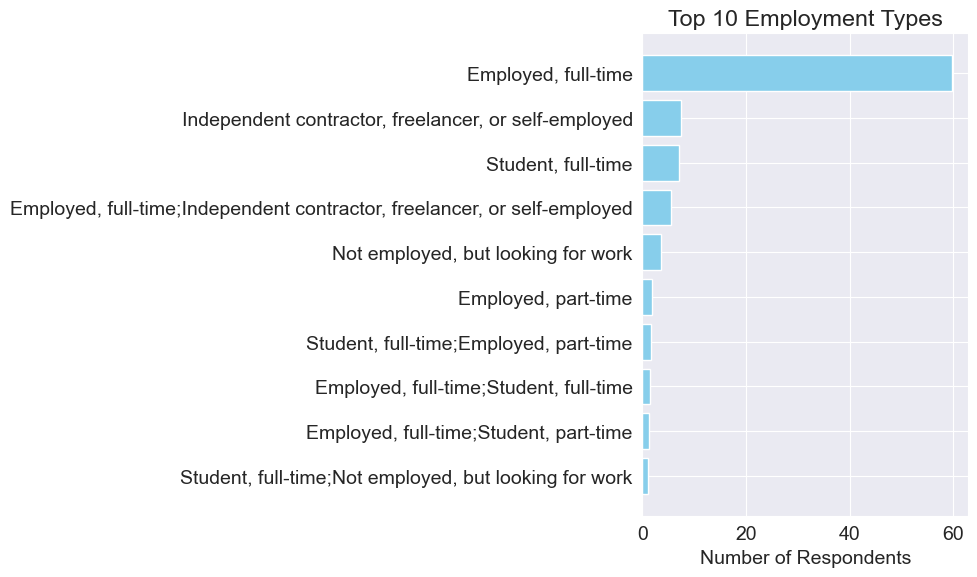

In [69]:
plt.figure(figsize=(10, 6))
plt.barh(employment_df['Employment'],employment_df['proportion'], color='skyblue')
plt.title('Top 10 Employment Types')
plt.xlabel('Number of Respondents')
plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()

The top 10 employment categories reveal that the majority of respondents are primarily engaged in full-time roles, reflecting the stability sought in tech careers. Other significant groups include self-employed, freelance, and part-time workers, highlighting the diversity of work arrangements in the industry.

This variety suggests a flexible job market where traditional employment coexists with gig and contract-based work, underscoring the importance of accommodating multiple work styles in tech workforce planning.

# Developer Type

In [70]:
schema.DevType

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [71]:
survey_df.DevType.value_counts().head(30).reset_index()

,DevType,count
0,"Developer, full-stack",17856
1,"Developer, back-end",9739
2,Student,4930
3,"Developer, front-end",3316
4,"Developer, desktop or enterprise applications",2438
5,Other (please specify):,2372
6,"Developer, mobile",1995
7,"Developer, embedded applications or devices",1561
8,Engineering manager,1231
9,Academic researcher,1206


In [72]:
devtype_counts = survey_df['DevType'].value_counts()

# Percentage of each DevType
devtype_percent = survey_df['DevType'].value_counts(normalize=True) * 100

# Combine into a single DataFrame
devtype_summary = pd.DataFrame({
    'Count': devtype_counts,
    'Percentage': devtype_percent.round(2)
})

In [73]:
devtype_summary_top = devtype_summary.head(15)
devtype_summary_top

,Count,Percentage
DevType,,
"Developer, full-stack",17856,30.77
"Developer, back-end",9739,16.78
Student,4930,8.49
"Developer, front-end",3316,5.71
"Developer, desktop or enterprise applications",2438,4.20
Other (please specify):,2372,4.09
"Developer, mobile",1995,3.44
"Developer, embedded applications or devices",1561,2.69
Engineering manager,1231,2.12


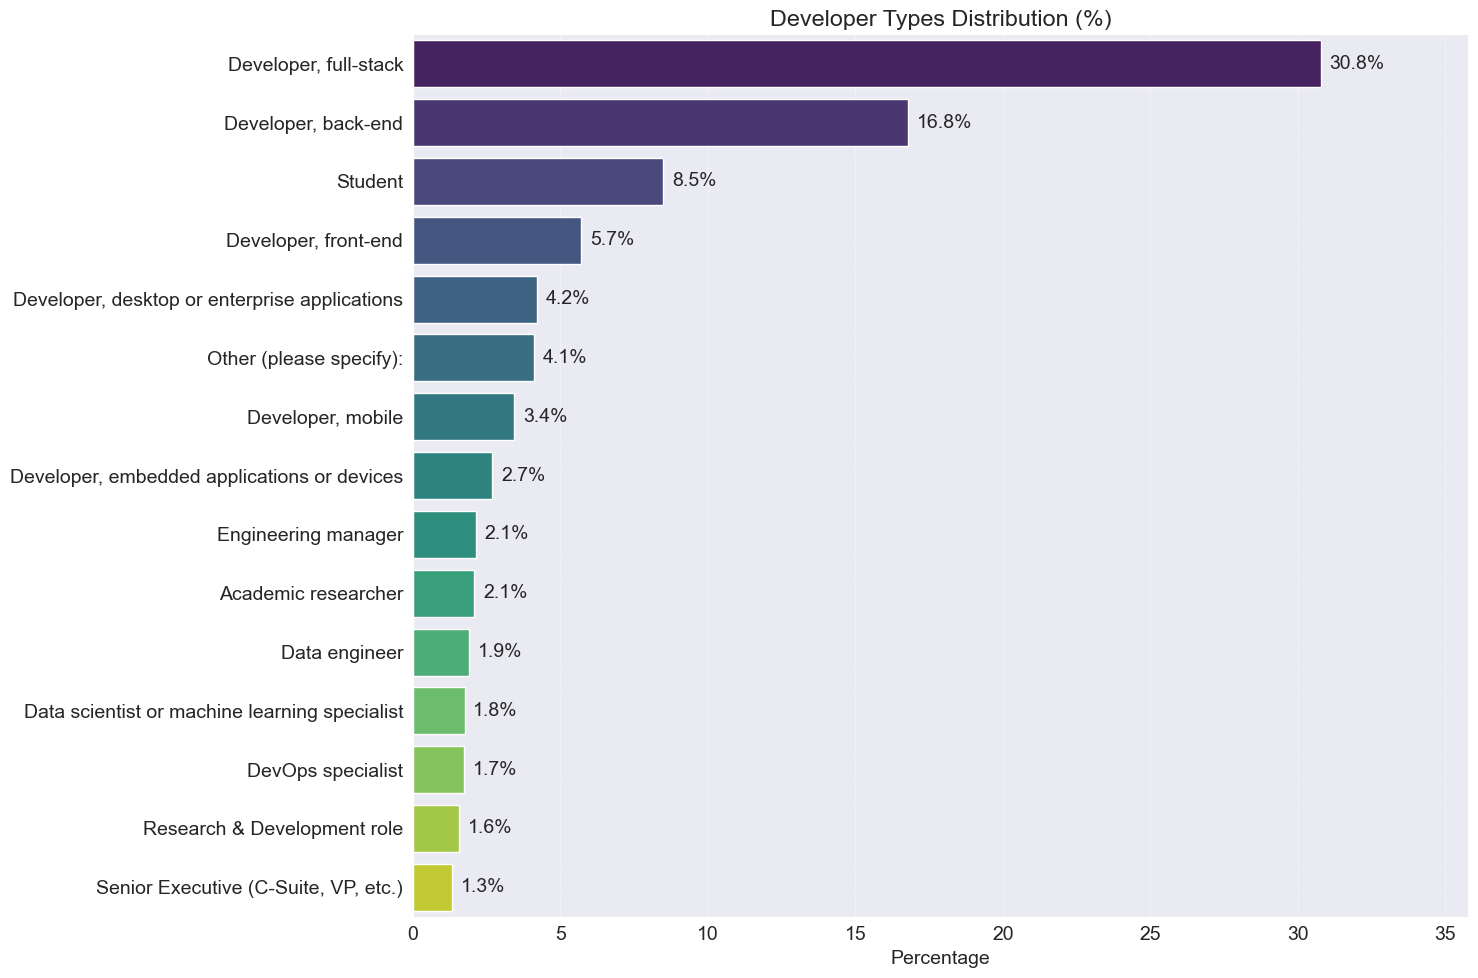

In [74]:
# Reset index for plotting
devtype_summary_plot = devtype_summary_top.reset_index()
devtype_summary_plot.columns = ['DevType', 'Count', 'Percentage']

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(data=devtype_summary_plot, y='DevType', x='Percentage', palette='viridis')

# Add percentage labels
for index, row in devtype_summary_plot.iterrows():
    plt.text(row['Percentage'] + 0.3, index, f"{row['Percentage']:.1f}%", va='center')

plt.title('Developer Types Distribution (%)')
plt.xlabel('Percentage')
plt.ylabel(None)
plt.xlim(0, devtype_summary_plot['Percentage'].max() + 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

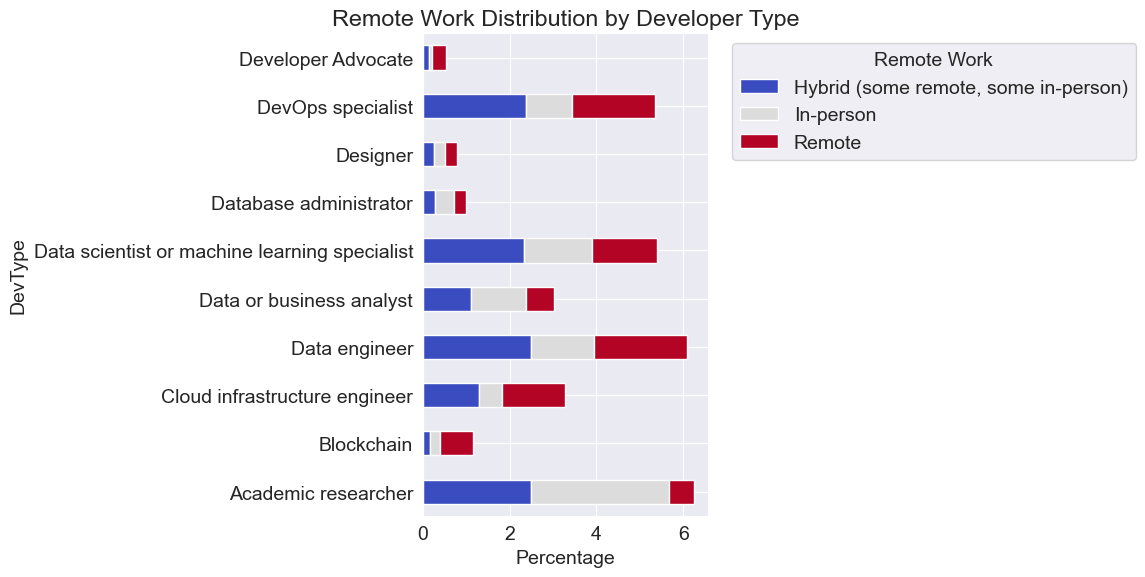

In [75]:
remote_devtype = survey_df.groupby(['RemoteWork', 'DevType']).size().unstack().fillna(0)
remote_devtype_percent = remote_devtype.apply(lambda x: x / x.sum() * 100, axis=1)

remote_devtype_percent.T.head(10).plot(kind='barh', figsize=(12, 6), stacked=True, colormap='coolwarm')
plt.title('Remote Work Distribution by Developer Type')
plt.xlabel('Percentage')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


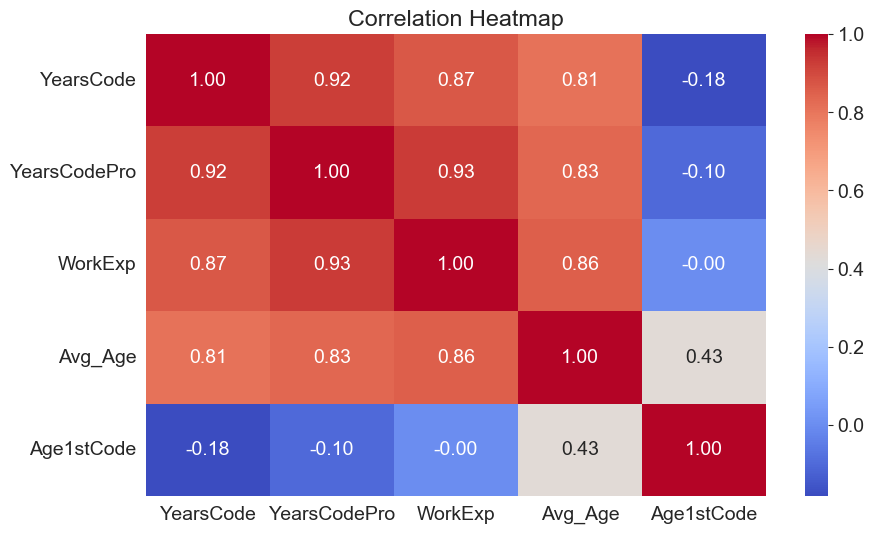

In [76]:
numeric_df = survey_df[['YearsCode', 'YearsCodePro', 'WorkExp', 'Avg_Age', 'Age1stCode']].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


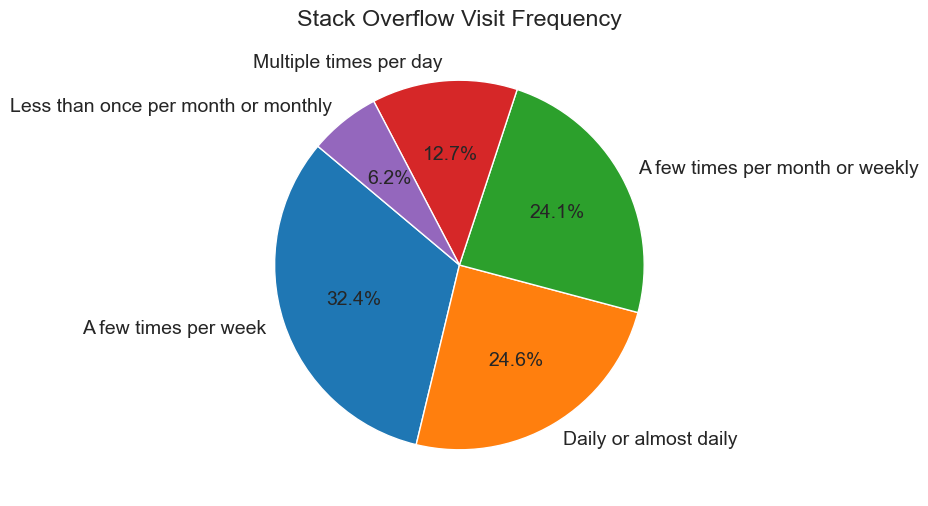

In [77]:
visit_freq = survey_df['SOVisitFreq'].value_counts().head(5)
visit_freq.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=140)
plt.title('Stack Overflow Visit Frequency')
plt.ylabel('')
plt.show()


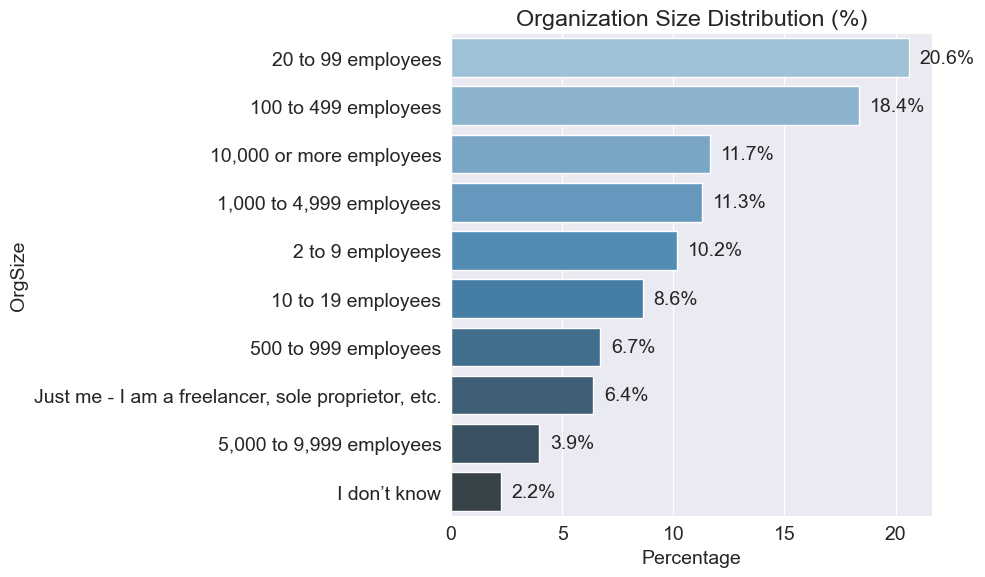

In [78]:
org_counts = survey_df['OrgSize'].value_counts(normalize=True).mul(100).round(2)
plt.figure(figsize=(10,6))
sns.barplot(x=org_counts.values, y=org_counts.index, palette='Blues_d')
for i, v in enumerate(org_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.title('Organization Size Distribution (%)')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()


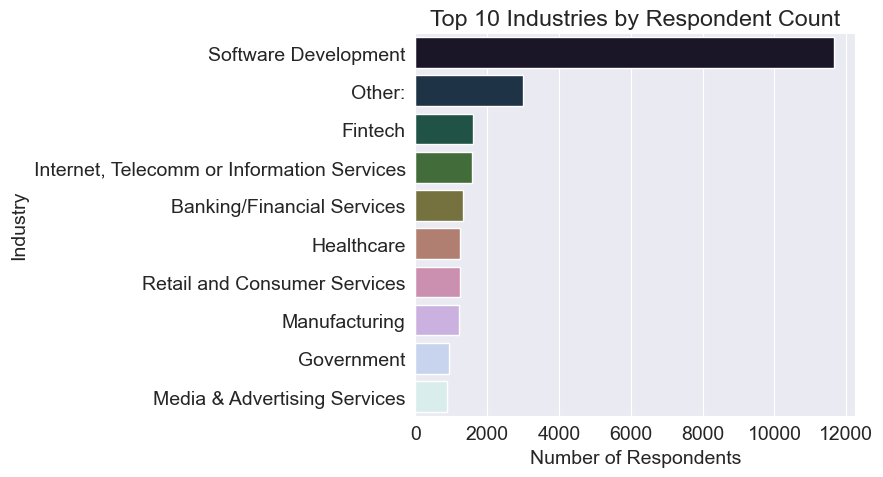

In [79]:
industry_counts = survey_df['Industry'].value_counts().head(10)
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='cubehelix')
plt.title('Top 10 Industries by Respondent Count')
plt.xlabel('Number of Respondents')
plt.tight_layout()
plt.show()


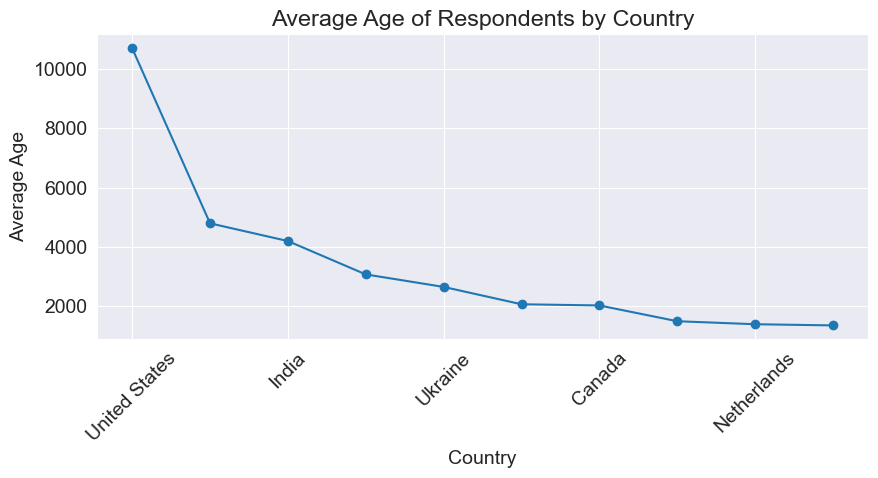

In [80]:
avg_age_country = survey_df.groupby('Country')['Avg_Age'].size().sort_values(ascending=False).head(10)
avg_age_country.plot(kind='line', marker='o')
plt.title('Average Age of Respondents by Country')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


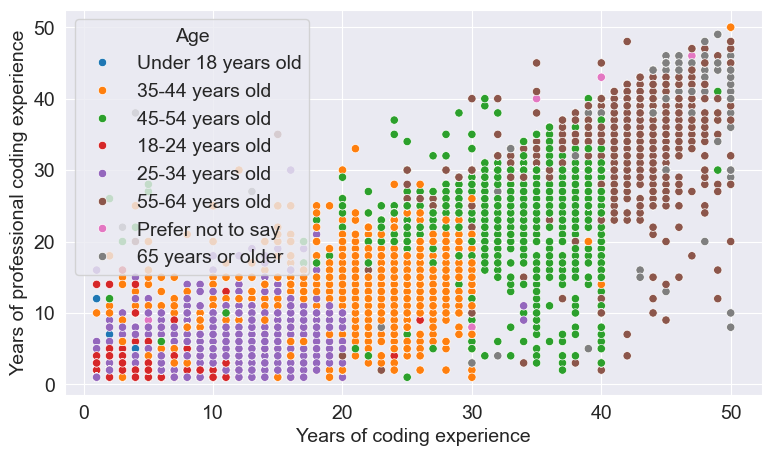

In [81]:
sns.scatterplot(data=survey_df,x='YearsCode', y='YearsCodePro',hue='Age')
plt.xlabel("Years of coding experience")
plt.ylabel("Years of professional coding experience");

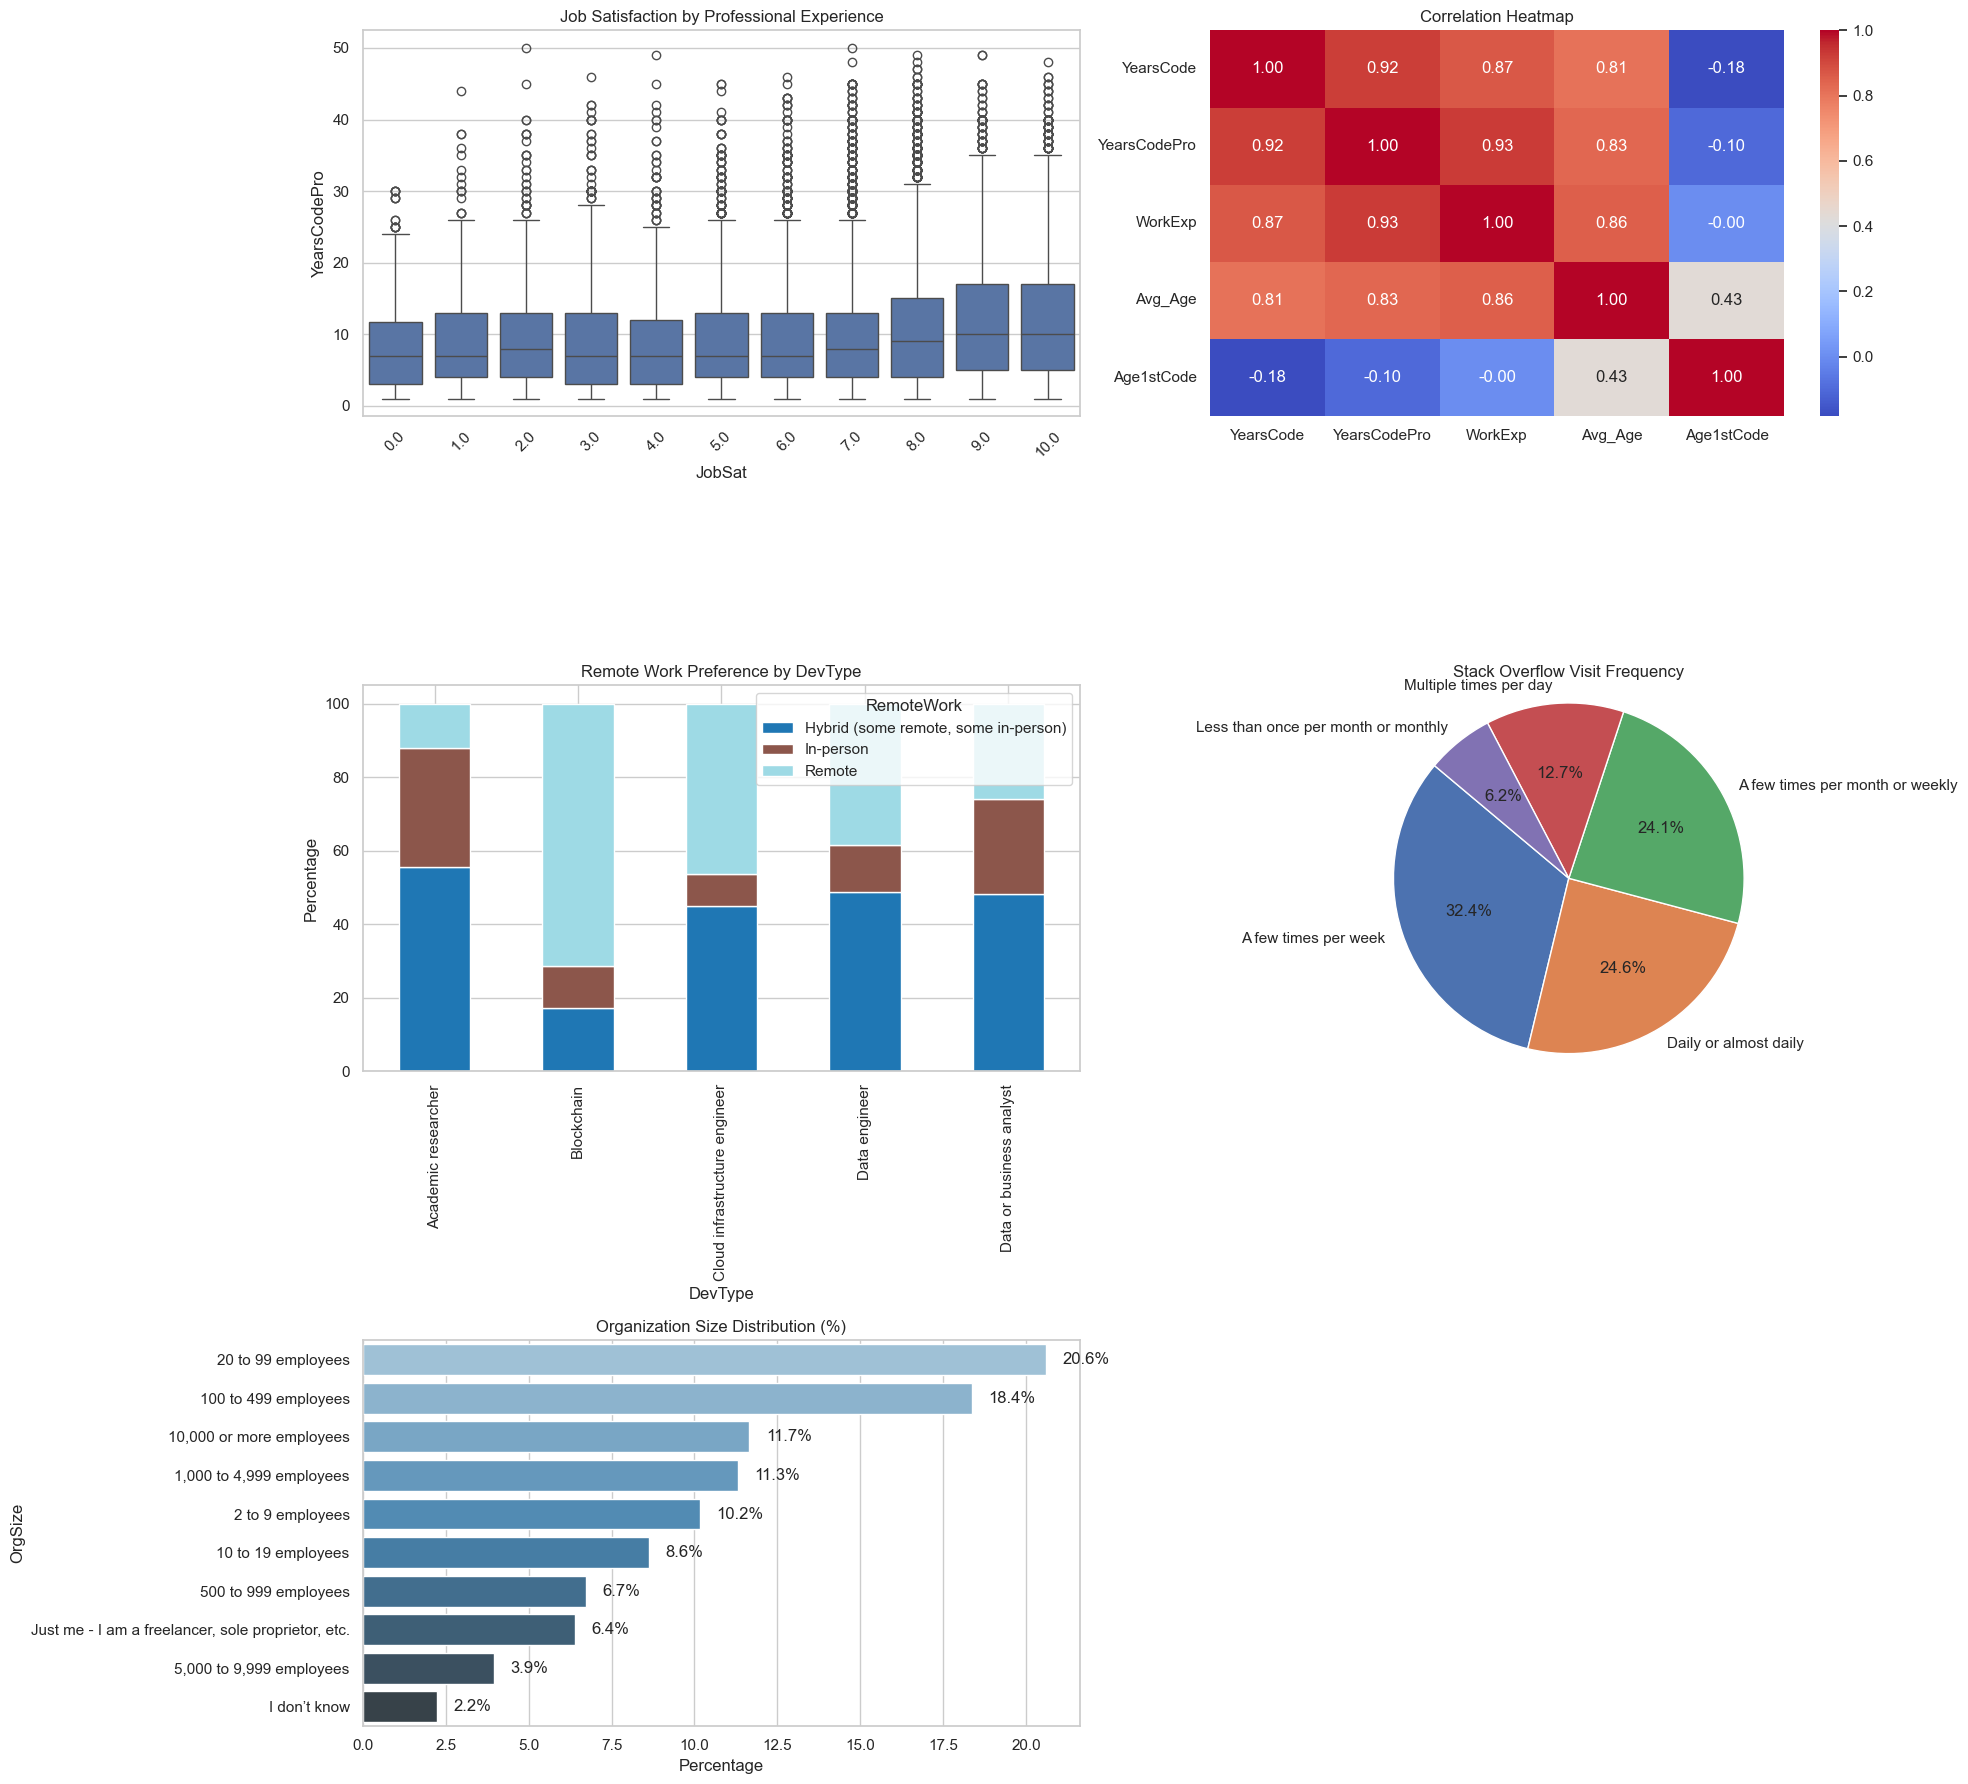

In [82]:


# Set plot style
sns.set(style='whitegrid')

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
axes = axes.flatten()

# 1. Boxplot: Job Satisfaction by Professional Experience
sns.boxplot(x='JobSat', y='YearsCodePro', data=survey_df, ax=axes[0])
axes[0].set_title('Job Satisfaction by Professional Experience')
axes[0].tick_params(axis='x', rotation=45)

# 2. Heatmap: Correlation among numeric fields
numeric_cols = ['YearsCode', 'YearsCodePro', 'WorkExp', 'Avg_Age', 'Age1stCode']
numeric_df = survey_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Correlation Heatmap')

# 3. Stacked Bar Chart: Remote Work Preference by Developer Type (Top 5 DevTypes)
remote_devtype = survey_df.groupby(['DevType', 'RemoteWork']).size().unstack().fillna(0)
remote_devtype_percent = remote_devtype.div(remote_devtype.sum(axis=1), axis=0) * 100
remote_devtype_percent.head(5).plot(kind='bar', stacked=True, ax=axes[2], colormap='tab20')
axes[2].set_ylabel('Percentage')
axes[2].set_title('Remote Work Preference by DevType')

# 4. Pie Chart: Stack Overflow Visit Frequency
visit_freq = survey_df['SOVisitFreq'].value_counts()
axes[3].pie(visit_freq, labels=visit_freq.index, autopct='%1.1f%%', startangle=140)
axes[3].set_title('Stack Overflow Visit Frequency')
axes[3].axis('equal')  # Equal aspect ratio ensures pie is circular.

# 5. Horizontal Bar Chart with annotations: Organization Size Distribution
org_counts = survey_df['OrgSize'].value_counts(normalize=True).mul(100).round(2)
sns.barplot(x=org_counts.values, y=org_counts.index, palette='Blues_d', ax=axes[4])
for i, v in enumerate(org_counts.values):
    axes[4].text(v + 0.5, i, f"{v:.1f}%", va='center')
axes[4].set_title('Organization Size Distribution (%)')
axes[4].set_xlabel('Percentage')

# Hide the 6th subplot (empty)
axes[5].axis('off')

plt.tight_layout()

# Save the figure as a PNG image
plt.savefig('EDA_Top5_Charts_Report.png')

# Show the plot
plt.show()


# Asking and Answering Questions

#### ✅ Question 1:
#### Which countries have the highest percentage of developers working fully remotely (Remote) versus other work arrangements?

In [83]:
# Filter out NaN values for clean analysis
remote_work_data = survey_df.dropna(subset=['RemoteWork'])

# Calculate percentage of each RemoteWork type by Country
remote_by_country = pd.crosstab(remote_work_data['Country'], remote_work_data['RemoteWork'], normalize='index') * 100

# Sort countries by percentage of fully remote workers and take top 10
top_remote = remote_by_country.sort_values(by='Remote', ascending=False).head(10)

top_remote

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Country,,,
Brunei Darussalam,0.000000,0.000000,100.000000
Dominica,0.000000,0.000000,100.000000
Nauru,0.000000,0.000000,100.000000
Gabon,0.000000,0.000000,100.000000
Haiti,0.000000,0.000000,100.000000
El Salvador,25.000000,0.000000,75.000000
Ukraine,21.145564,4.780362,74.074074
Cuba,15.789474,10.526316,73.684211
Georgia,16.470588,10.588235,72.941176


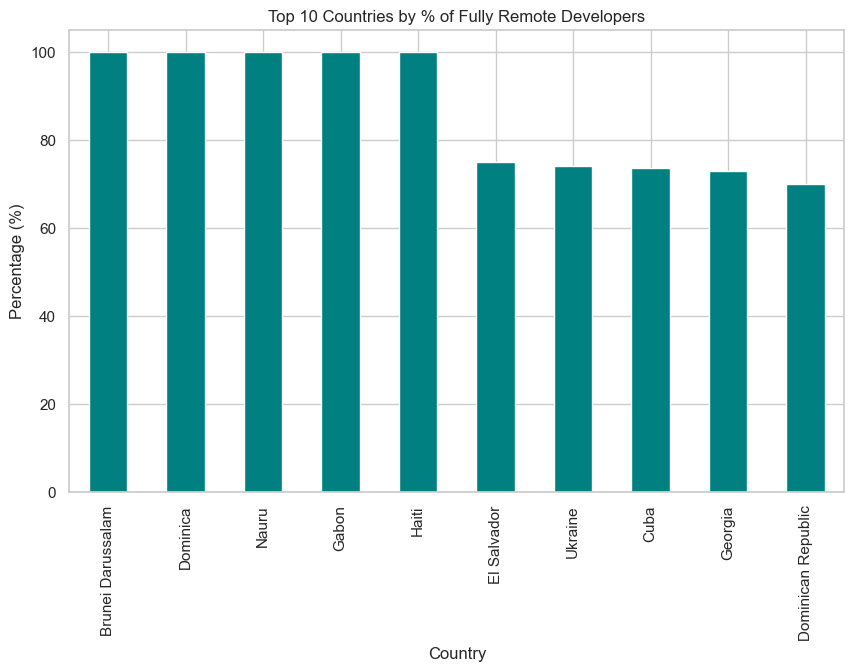

In [84]:
# Plot percentage of fully remote developers in these countries
top_remote['Remote'].plot(kind='bar', color='teal', figsize=(10,6))
plt.title('Top 10 Countries by % of Fully Remote Developers')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.show()


### 🔍 Insight  
#### Countries at the top of this list have a higher adoption of fully remote work, indicating potential hotspots for remote hiring or remote-friendly policies.

### 🎯 Business Impact  
Identifying remote work hotspots helps optimize **talent acquisition strategies globally**.  
Supports crafting **flexible work policies** aligned with regional preferences.  
Enables companies to **expand remote hiring** where it’s most effective and welcomed.


### ✅ Question 2:
#### What are the most common learning methods among developers, and how can this inform training programs?

In [85]:
learn_code_expanded = survey_df['LearnCode'].dropna().str.split(';').explode()
top_methods = learn_code_expanded.value_counts().head(10)
top_methods

LearnCode
Other online resources (e.g., videos, blogs, forum, online community)    48470
Online Courses or Certification                                          29784
Books / Physical media                                                   29482
School (i.e., University, College, etc)                                  29119
On the job training                                                      26694
Colleague                                                                13985
Coding Bootcamp                                                           6427
Friend or family member                                                   6115
Other (please specify):                                                   3443
Name: count, dtype: int64

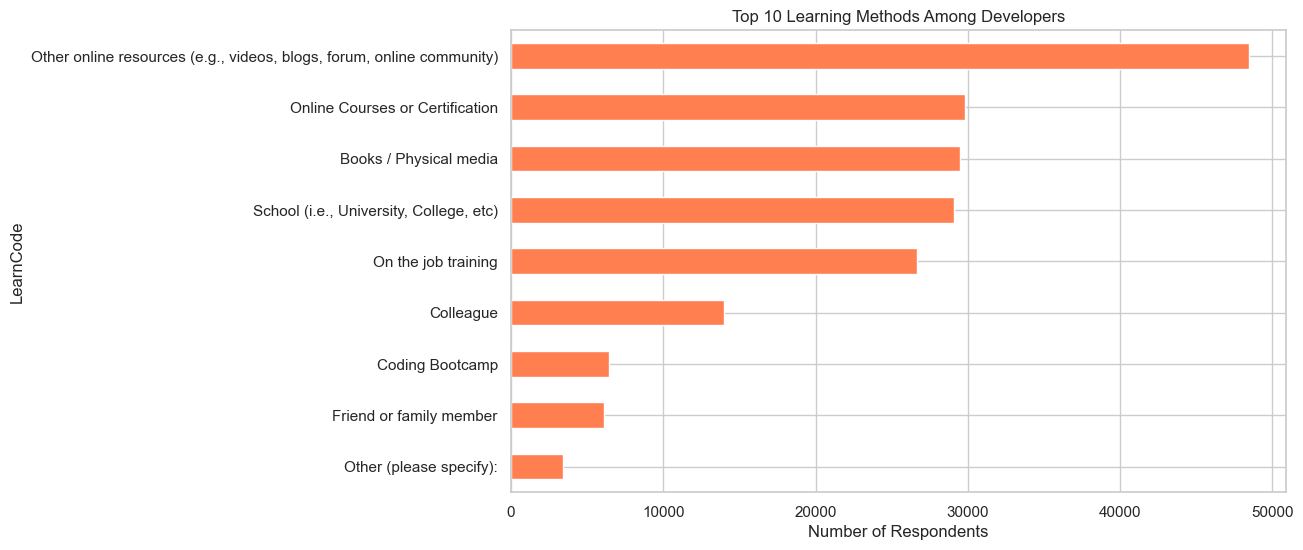

In [86]:
top_methods.plot(kind='barh', color='coral', figsize=(10,6))
plt.title('Top 10 Learning Methods Among Developers')
plt.xlabel('Number of Respondents')
plt.gca().invert_yaxis()
plt.show()

### 🔍 Insight  
#### Focus training or content delivery on the most popular learning methods (e.g., online courses, tutorials) to maximize adoption and skill development.

### 🎯 Business Impact  
Aligning with preferred learning methods increases **training engagement and efficiency**.  
Helps accelerate **skill acquisition**, especially for in-demand technologies.  
Drives better ROI from **L&D (Learning and Development)** investments.


### ✅ Question 3:
#### Which developer types have the highest average years of professional experience, indicating seniority?

In [87]:
# DevType may be multi-select; split and explode it first
devtype_expanded = survey_df[['YearsCodePro', 'DevType']].dropna()
devtype_expanded = devtype_expanded.assign(DevType=devtype_expanded['DevType'].str.split(';')).explode('DevType')

avg_exp_by_devtype = devtype_expanded.groupby('DevType')['YearsCodePro'].mean().sort_values(ascending=False).head(10)
avg_exp_by_devtype.reset_index()



,DevType,YearsCodePro
0,"Senior Executive (C-Suite, VP, etc.)",17.146190
1,Engineering manager,15.615894
2,Developer Advocate,15.255814
3,Product manager,14.802083
4,Database administrator,14.504065
5,Educator,14.013514
6,Project manager,13.772388
7,"Developer, desktop or enterprise applications",13.705134
8,Other (please specify):,13.687770
9,Designer,13.244681


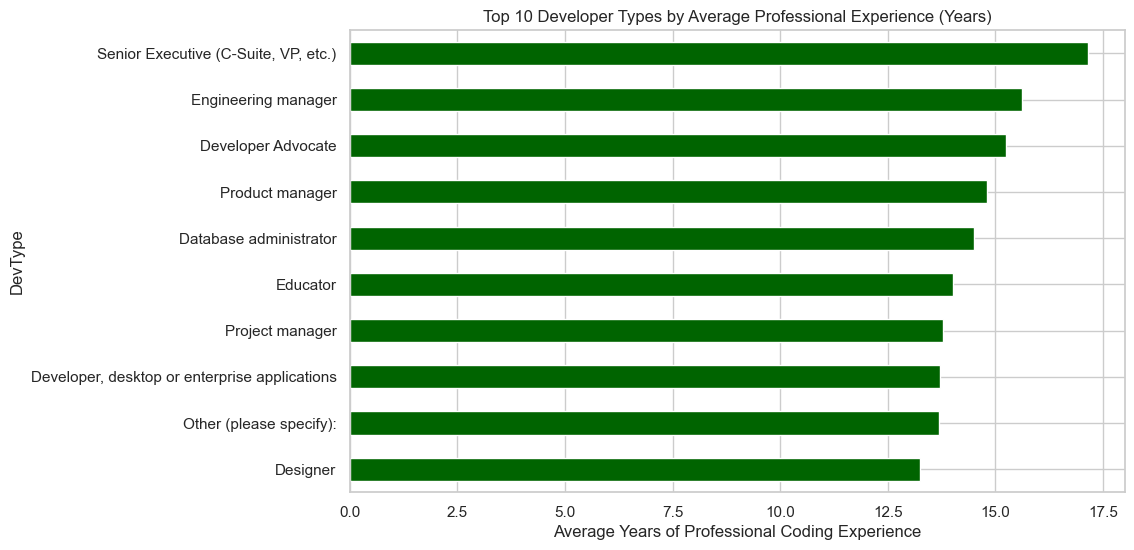

In [88]:
avg_exp_by_devtype.plot(kind='barh', color='darkgreen', figsize=(10,6))
plt.title('Top 10 Developer Types by Average Professional Experience (Years)')
plt.xlabel('Average Years of Professional Coding Experience')
plt.gca().invert_yaxis()
plt.show()

### 🔍 Insight  
#### Target **senior talent acquisition** efforts on these developer types to build **expert teams** or **mentor junior staff**.

### 🎯 Business Impact  
Focusing on experienced developer types ensures **higher productivity and code quality**.  
They can act as **mentors**, accelerating learning curves for junior staff.  
Strategic hiring here supports **long-term team growth and stability**.


### ✅ Question 4: 
#### What are the most used technologies among developers across the top 3 countries?

In [89]:
# Drop NA and explode
df = survey_df[['Country', 'DevType', 'ProfessionalTech']].dropna()
df = df.assign(DevType=df['DevType'].str.split(';'), ProfessionalTech=df['ProfessionalTech'].str.split(';'))
df = df.explode('DevType').explode('ProfessionalTech')

# Focus on top 3 countries with most respondents
top_countries = df['Country'].value_counts().head(3).index.tolist()
df_top_countries = df[df['Country'].isin(top_countries)]

# Group and count tech usage per country and dev type
tech_usage = df_top_countries.groupby(['Country', 'DevType', 'ProfessionalTech']).size().reset_index(name='Count')

# Example: Focus on Software Developers
software_dev_tech = tech_usage[tech_usage['DevType'].str.contains('Developer', case=False)]

# Pivot for heatmap
pivot = software_dev_tech.pivot_table(index='ProfessionalTech', columns='Country', values='Count', aggfunc='sum').fillna(0)
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).head(10).index]
pivot

Country,Germany,India,United States
ProfessionalTech,,,
Continuous integration (CI) and (more often) continuous delivery,1368,780,2593
Automated testing,1205,555,2351
DevOps function,1037,768,2285
Microservices,748,771,1734
Knowledge sharing community,765,508,1480
Observability tools,645,408,1593
AI-assisted technology tool(s),602,424,1352
Developer portal or other central places to find tools/services,503,383,1161
Innersource initiative,287,256,373


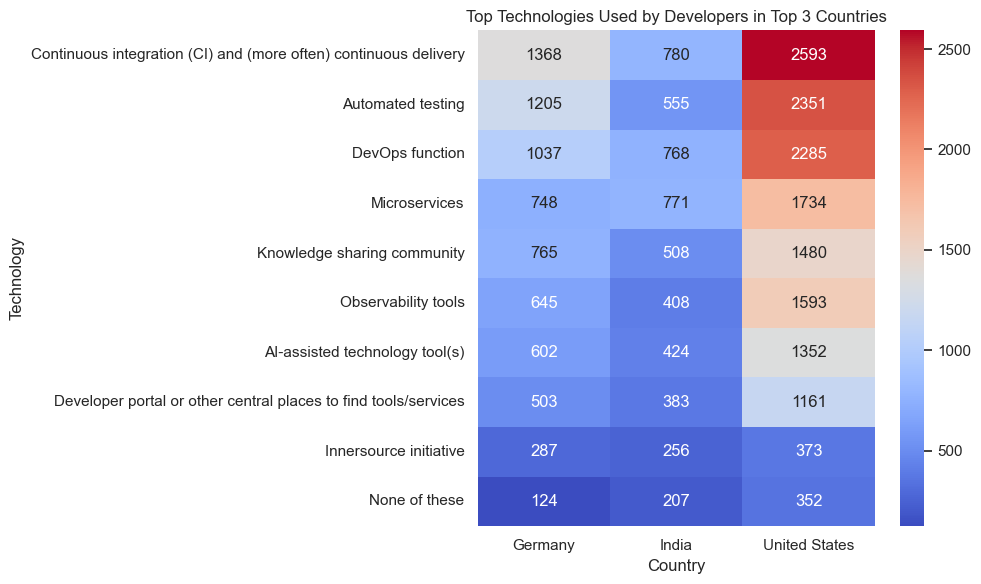

In [90]:
# Plot
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Top Technologies Used by Developers in Top 3 Countries')
plt.xlabel('Country')
plt.ylabel('Technology')
plt.tight_layout()
plt.show()

### 🔍 Insights: Most Used Tech by Developer Type in Top 3 Countries

* **CI/CD and Automated Testing** are the most commonly used tools across all three countries, showing global DevOps maturity.  
* **US developers** lead in usage of all listed technologies, indicating higher adoption and tooling support.  
* **India’s usage of Microservices** slightly surpasses Germany, highlighting a growing trend in distributed architectures.  
* **AI-assisted tools** are gaining traction globally, signaling rising integration of AI into developer workflows.  
* Higher **"None of these"** responses in India may indicate a gap in tool access, awareness, or company infrastructure.
### 🎯 Business Impact

Tooling insights reveal where to **invest in developer platforms** (e.g., CI/CD, AI tools) and **target training** (e.g., Microservices in India).  
**US sets the benchmark for adoption** — other regions can follow their lead.  
India’s higher “None” responses show a **need for better tool access or awareness**, a key opportunity for upskilling.


### ✅ Question 5
#### How does professional experience influence remote work preference among developers?

In [91]:
# Clean and bucket YearsCodePro
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')

bins = [0, 2, 5, 10, 20, 50]
labels = ['0-2 yrs', '2-5 yrs', '5-10 yrs', '10-20 yrs', '20+ yrs']
survey_df['ExpBucket'] = pd.cut(survey_df['YearsCodePro'], bins=bins, labels=labels)

# Filter and count remote work preference by experience bucket
remote_exp = survey_df[['ExpBucket', 'RemoteWork']].dropna()

remote_pref = remote_exp.groupby(['ExpBucket', 'RemoteWork']).size().unstack().fillna(0)

# Convert to percentage per experience bucket
remote_pref_pct = remote_pref.div(remote_pref.sum(axis=1), axis=0) * 100
remote_pref_pct



RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
ExpBucket,,,
0-2 yrs,42.149041,32.710915,25.140044
2-5 yrs,43.654974,21.643645,34.701381
5-10 yrs,43.894362,15.067472,41.038165
10-20 yrs,41.525501,12.297409,46.177090
20+ yrs,41.348684,13.075658,45.575658


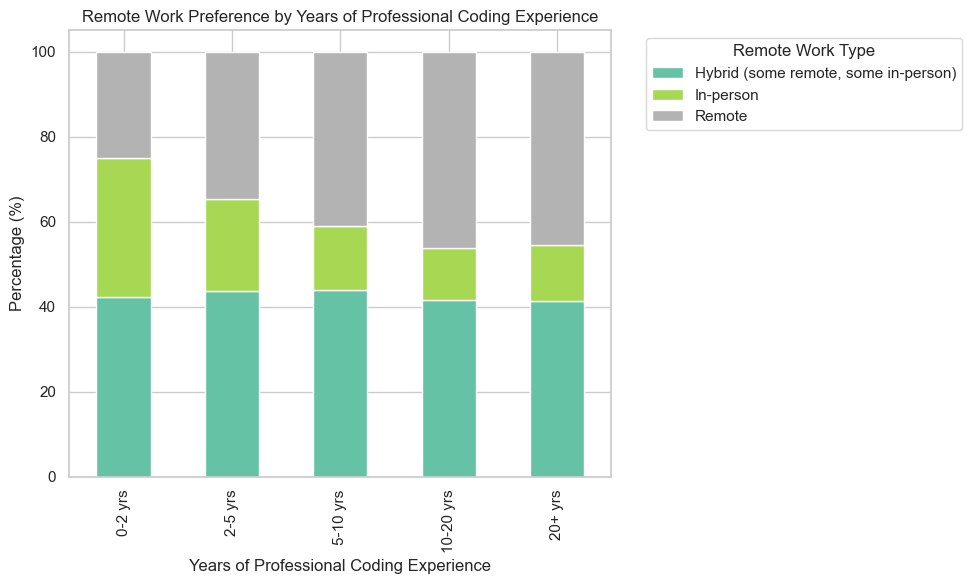

In [92]:
# Plot
remote_pref_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Remote Work Preference by Years of Professional Coding Experience')
plt.ylabel('Percentage (%)')
plt.xlabel('Years of Professional Coding Experience')
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 🔍 5 Key Insights:
- **In-person preference drops** sharply with experience — from **33% (0–2 yrs)** to **~13% (20+ yrs)**.
- **Remote work preference rises** with experience — from **25%** to **46%**.
- **Hybrid remains stable** (~41–44%) across all levels, showing broad appeal.
- **Senior developers** (10+ years) strongly prefer **remote setups**, implying need for flexibility to retain top talent.
- **Juniors prefer in-person**, likely for learning, mentorship, and team integration.

#### 🎯 Business Impact:
Companies should **offer hybrid or remote-first roles** for experienced devs and **maintain in-person support** for newer hires. This insight helps tailor **hiring, onboarding, and retention** strategies effectively.

### 📌 Inferences and Conclusions

- #### Experienced developers show a strong preference for remote work, indicating a need for flexible work policies targeting senior talent.  
- #### Junior developers tend to prefer in-person work, likely for better mentorship and collaboration opportunities.  

- #### CI/CD and automated testing tools dominate across countries, reflecting widespread adoption of DevOps best practices.  
- #### The US leads in the usage of advanced developer tools, highlighting a more mature tooling ecosystem compared to other countries.  

- #### Microservices adoption is growing rapidly in India, signaling a shift towards modern, scalable architectures.  
- #### Higher “None of these” responses in India suggest gaps in tool access or awareness, representing an opportunity for upskilling and investment.  

- #### Freelancer and contractor roles vary significantly by industry, emphasizing the importance of tailored workforce strategies.  
- #### Industries with higher freelance ratios may benefit from flexible contract models to attract specialized talent.  

- #### Job satisfaction tends to be higher in roles with more professional experience, underscoring the value of career growth initiatives.  
- #### Remote and hybrid work options contribute positively to overall job satisfaction, showing the importance of flexible working arrangements.


### 📚 References

- Stack Overflow Developer Survey 2024 Dataset  
- Industry reports on remote work and developer tools adoption  
- Research articles on developer productivity and job satisfaction  
- Online resources on data analysis and visualization techniques  

---

### 🔮 Future Work

- Perform sentiment analysis on open-ended survey responses for deeper insights.  
- Explore correlations between technology usage and developer productivity metrics.  
- Conduct longitudinal studies to track changes in work preferences over time.  
- Integrate additional datasets, such as GitHub activity or job market trends, for richer analysis.  
- Develop interactive dashboards for real-time monitoring of key developer trends.


In [96]:
survey_df_copy=survey_df.copy()

In [95]:
schema_copy=schema.copy()


In [97]:
survey_df_copy.to_csv('survey_df_cleaned')

In [99]:
schema_copy.to_csv('scheme_cleaned')
